Epoch 1/100


<ipython-input-7-a08518fa1d92>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['symbol'], axis=1, inplace=True)
<ipython-input-7-a08518fa1d92>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['date'], axis=1, inplace=True)


44/44 [==============================] - 1s 2ms/step - loss: 0.0250 - accuracy: 0.0014
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.0014
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.0014
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.0014
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.0014
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.0014
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.0014
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0014
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0014
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0014
Epoch 11/100
44/44 [=

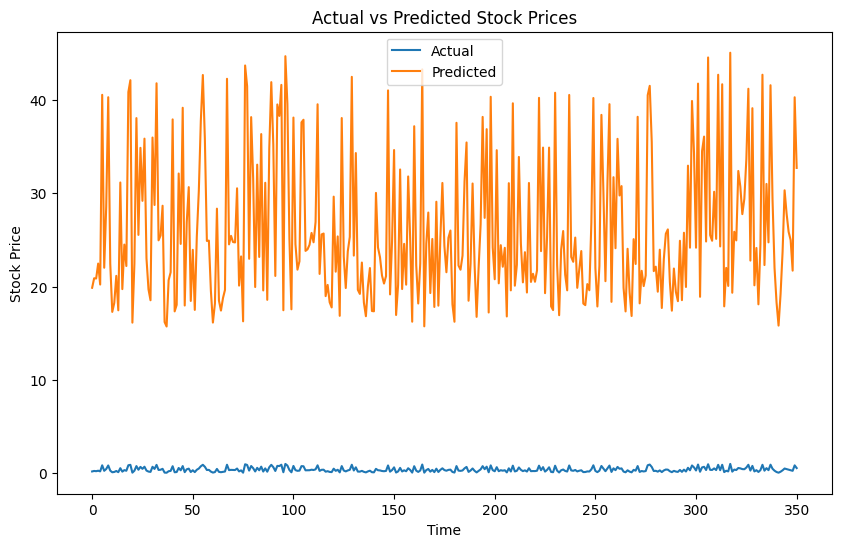

Train Loss: [0.0009805490262806416, 0.001427551731467247]
Test Loss: [0.0005858027725480497, 0.0]
RMSE: 26.876716993818523


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout

df = pd.read_csv('stock_data.csv')
df1=df[df['symbol']=='NI']

df1.drop(['symbol'], axis=1, inplace=True)
df1.drop(['date'], axis=1, inplace=True)

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1['close'].values.reshape(-1, 1))  # Scale the closing prices

# Prepare the input features and target variable
lookback = 10  # Number of previous days to consider
X = []
y = []
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i-lookback:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lookback,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Inverse transform the scaled predictions

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

# Plot the test vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

print('Train Loss:', train_loss)
print('Test Loss:', test_loss)
print('RMSE:', rmse)
